# Comparison of vergence and center-based gaze distance estimation methods

vergence_wang refers to the work of Wang et al. [1]  
vergence_weier refers to the work of Weier et al.[2]  
(full citations in the end)

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

import numpy as np
from sklearn.metrics import r2_score


figwidth_fraction = 0.44
base_font_size_labels = 8
base_font_size_ticks = 7

label_font_size = base_font_size_labels / figwidth_fraction
tick_font_size = base_font_size_ticks / figwidth_fraction

params = {'legend.fontsize': label_font_size,
         'axes.labelsize': label_font_size,
         'axes.titlesize': label_font_size,
         'xtick.labelsize': tick_font_size,
         'ytick.labelsize': tick_font_size}
pylab.rcParams.update(params)

In [3]:
current_path = os.getcwd()

path = os.path.abspath(os.path.join(current_path, '..', 'data', 'mlp_training_data_10percent_ang2.feather'))
data = pd.read_feather(path)

current_path = os.getcwd()
figpath = os.path.join(current_path, '..', '..', 'Thesis', 'Thesis Github', 'thesis', 'figures')

display(data)

def evaluate(y_pred, y_test):

    # replace 0s by 10-3
    y_pred[y_pred == 0] = 10 ** -3

    mse = np.mean((y_test - y_pred) ** 2)
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    mae = np.mean(np.abs(y_test - y_pred))
    me = np.mean(y_pred - y_test)
    r2 = r2_score(y_pred, y_test)
    #mabse = np.median(np.abs(y_test - y_pred))

    mse_diopters = np.mean((1 / y_test - 1 / y_pred) ** 2)
    rmse_diopters = np.sqrt(np.mean((1 / y_test - 1 / y_pred) ** 2))
    mae_diopters = np.mean(np.abs(1 / y_test - 1 / y_pred))
    me_diopters = np.mean(1 / y_pred - 1 / y_test)
    r2_diopters = r2_score(1 / y_pred, 1 / y_test)
    #mabse_diopters = np.median(np.abs(1 / y_test - 1 / y_pred))

    error_diopters = np.abs(1 / y_pred - 1 / y_test)
    error = np.abs(y_pred - y_test)
    percent_below_01_m = np.sum(error < 0.01) / len(error) * 100
    percent_below_01 = np.sum(error_diopters < 0.0125) / len(error_diopters) * 100

    error = np.abs(y_pred - y_test)

    return mse, rmse, mae, me, r2, percent_below_01_m, mse_diopters, rmse_diopters, mae_diopters, me_diopters, r2_diopters, percent_below_01

# define colors
cmap = plt.get_cmap('tab20b')

basecolor = cmap(0)
highlightcolor = cmap(8)
highlightcolor2 = cmap(4)
highlightcolor3 = cmap(12)
highlightcolor4 = cmap(16)

highlightcolora = cmap(8)
highlightcolorb = cmap(9)
highlightcolorc = cmap(10)
highlightcolord = cmap(11)

figwidth_fraction = 0.44
base_font_size_labels = 8
base_font_size_ticks = 5

label_font_size = base_font_size_labels / figwidth_fraction
tick_font_size = base_font_size_ticks / figwidth_fraction


,center,eccentricity,vergence,samples,distance,scene_id,target_id,participant_id
0,3.058371,2.765340,2.469097,"[3.0423426538648055, 2.9912332362332976, 2.959...",3.066296,1,265,10
1,3.060320,2.923929,2.593392,"[3.103186770843455, 2.727503545260473, 3.08338...",3.066224,1,265,10
2,3.058926,2.972646,8.255766,"[3.068547006306325, 3.0636949053597067, 3.1011...",3.066627,1,265,10
3,3.090785,2.261143,5.204067,"[3.018766975082738, 2.720200655161243, 3.09324...",3.068665,1,265,10
4,3.046856,3.027680,3.065582,"[3.0154513197010773, 3.066081781039106, 3.0131...",3.067154,1,265,10
...,...,...,...,...,...,...,...,...
110991,0.744757,11.666861,0.497740,"[0.7126906618396457, 0.7320379580078694, 0.757...",0.731245,3,226,9
110992,0.735532,11.265782,0.538534,"[0.7079055060952646, 0.7474264551725949, 0.476...",0.730170,3,226,9
110993,0.736519,11.347361,0.495346,"[0.7763343704964408, 0.4901836819595985, 0.727...",0.730923,3,226,9
110994,0.735531,11.265415,0.552883,"[0.766348877376311, 0.7076580662626355, 0.6961...",0.730368,3,226,9


In [4]:
path = os.path.abspath(os.path.join(current_path, '..', 'data', 'et_data_10percent_ang2.feather'))
et_data = pd.read_feather(path)

display(et_data)

,scene_id,participant_id,frame_number,decva,ipd_manual,ipd_vr,vergence_estimation,target_distance,ang_diff,left_eye_origin.x,...,combined_eye_gaze.z,vergence_weier,vergence_wang,target_depth,combined_eye_gaze_local.x,combined_eye_gaze_local.y,combined_eye_gaze_local.z,eccentricity,target_id,target_count
0,1,10,54,1.81,63.5,62.7,None,3.066296,0.693791,2.098547,...,-0.711934,2.469097,2.707467,3.061080,0.040298,0.026520,0.998756,2.765340,265,3102
1,1,10,57,1.81,63.5,62.7,None,3.066224,0.466436,2.098475,...,-0.712828,2.593392,2.614516,3.061104,0.040932,0.030434,0.998619,2.923929,265,3102
2,1,10,40,1.81,63.5,62.7,None,3.066627,0.114244,2.098822,...,-0.712614,8.255766,10.588398,3.062037,0.042580,0.029602,0.998642,2.972646,265,3102
3,1,10,1,1.81,63.5,62.7,None,3.068665,0.612294,2.092914,...,-0.716648,5.204067,14.463678,3.066186,0.034241,0.019600,0.999207,2.261143,265,3102
4,1,10,35,1.81,63.5,62.7,None,3.067154,0.442363,2.098424,...,-0.708840,3.065582,3.685828,3.061341,0.043343,0.030182,0.998558,3.027680,265,3102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110991,3,9,8885,1.86,55.5,62.7,None,0.731245,0.841713,1.270364,...,0.379391,0.497740,0.612238,0.715936,0.191147,0.065308,0.978249,11.666861,226,3019
110992,3,9,8960,1.86,55.5,62.7,None,0.730170,0.371141,1.272135,...,0.379325,0.538534,0.618433,0.715796,0.185547,0.060493,0.979721,11.265782,226,3019
110993,3,9,8923,1.86,55.5,62.7,None,0.730923,0.470024,1.271244,...,0.378469,0.495346,0.614429,0.716473,0.187515,0.058861,0.979355,11.347361,226,3019
110994,3,9,8956,1.86,55.5,62.7,None,0.730368,0.372773,1.271944,...,0.379039,0.552883,0.619737,0.716034,0.185631,0.060234,0.979752,11.265415,226,3019


Evaluation for wang


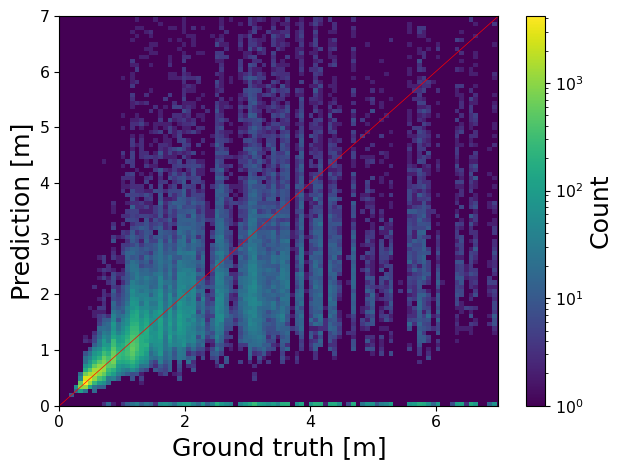

MSE: 11.690983316129037
RMSE: 3.4192079954470502
MAE: 1.5818947134628971
ME: -0.2521586409092903
R2: -0.0670946125526457
Percent below 0.01 m: 4.4929547010703095
MSE diopters: 70185.72209540218
RMSE diopters: 264.9258803805362
MAE diopters: 70.39814405131405
ME diopters: 70.21292798381877
R2 diopters: -0.0772330638103198
Percent below 0.125 diopters: 3.9037442790731194


Evaluation for weier


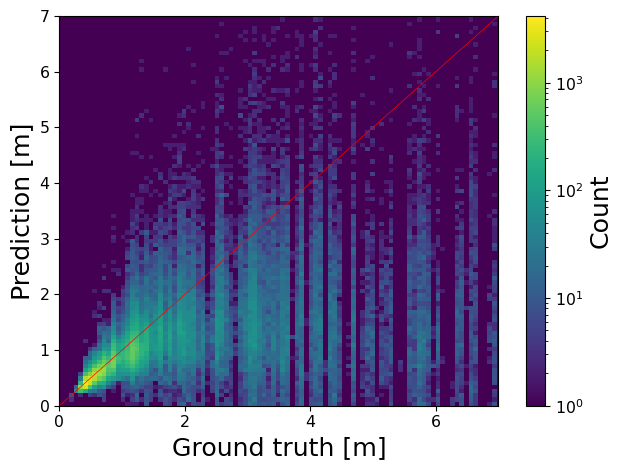

MSE: 7.619516953272264
RMSE: 2.76034725229857
MAE: 1.3527380163886342
ME: -1.0065351340636586
R2: -1.8478263200897955
Percent below 0.01 m: 3.9388806803848784
MSE diopters: 27.88607948145437
RMSE diopters: 5.28072717354858
MAE diopters: 0.6673376423984071
ME diopters: 0.5678209635772697
R2 diopters: -0.015130270983025218
Percent below 0.125 diopters: 2.985693178132545


Evaluation for center


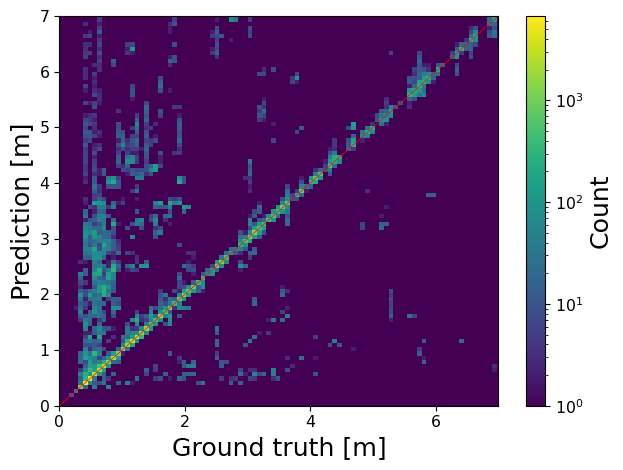

MSE: 7.087075349914598
RMSE: 2.6621561467942856
MAE: 0.8000537775717674
ME: 0.6932068503392665
R2: 0.47262865531537324
Percent below 0.01 m: 51.335183249846835
MSE diopters: 0.22059500850413005
RMSE diopters: 0.46967542889119723
MAE diopters: 0.18595455884425985
ME diopters: -0.14942472805637916
R2 diopters: 0.5787056570557745
Percent below 0.125 diopters: 67.83307506576813




In [5]:
y_pred_center = np.array(data['center'])
y_pred_vergence_weier = np.array(et_data['vergence_weier'])
y_pred_vergence_wang = np.array(et_data['vergence_wang'])

y_test = np.array(et_data['target_distance'])

# save to files


# clip y_test to [0,20], as it's done for the ML models
y_test = np.clip(y_test, 0, 20)
y_pred_center = np.clip(y_pred_center, 0, 20)
y_pred_vergence_weier = np.clip(y_pred_vergence_weier, 0, 20)
y_pred_vergence_wang = np.clip(y_pred_vergence_wang, 0, 20)

np.save('y_pred_center.npy', y_pred_center)
np.save('y_pred_vergence_weier.npy', y_pred_vergence_weier)
np.save('y_pred_vergence_wang.npy', y_pred_vergence_wang)
np.save('y_test.npy', y_test)


y_preds = [y_pred_vergence_wang, y_pred_vergence_weier, y_pred_center]
names = ['wang', 'weier', 'center']
df_results = pd.DataFrame(columns=['mse', 'rmse', 'mae', 'me', 'r2', 'mse_diopters', 'rmse_diopters', 'mae_diopters', 'me_diopters', 'r2_diopters', 'percent_below_01'])

for i, y_pred in enumerate(y_preds):
    print(f'Evaluation for {names[i]}')
    plt.hist2d(y_test, y_pred, bins=200, cmap='viridis', range=[[0, 15], [0, 15]], rasterized=True, norm=plt.cm.colors.LogNorm())

    plt.xlabel('Ground truth [m]', fontsize=label_font_size)
    plt.ylabel('Prediction [m]', fontsize=label_font_size)
    plt.xticks(fontsize=tick_font_size)
    plt.yticks(fontsize=tick_font_size)
    plt.xlim(0, 7)
    plt.ylim(0, 7)

    # set background color to black
    plt.gca().set_facecolor(plt.get_cmap('viridis')(0))
    
    # add colormap label
    cbar = plt.colorbar()
    cbar.set_label('Count', fontsize=label_font_size)
    cbar.ax.tick_params(labelsize=tick_font_size)

    # plot the line of equality
    plt.plot([0, 20], [0, 20], color='red', linewidth=0.5)
    plt.tight_layout()
    #plt.savefig(names[i] + '.pdf', dpi=900)
    plt.show()

    mse, rmse, mae, me, r2, percent_below_01_m, mse_diopters, rmse_diopters, mae_diopters, me_diopters, r2_diopters, percent_below_01 = evaluate(y_pred, y_test)
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'ME: {me}')
    print(f'R2: {r2}')
    print(f'Percent below 0.01 m: {percent_below_01_m}')
    print(f'MSE diopters: {mse_diopters}')
    print(f'RMSE diopters: {rmse_diopters}')
    print(f'MAE diopters: {mae_diopters}')
    print(f'ME diopters: {me_diopters}')
    print(f'R2 diopters: {r2_diopters}')
    print(f'Percent below 0.125 diopters: {percent_below_01}')

    #df_results = pd.concat([df_results, pd.DataFrame({'mse': [mse], 'rmse': [rmse], 'mae': [mae], 'me': [me], 'r2': [r2], 'mse_diopters': [mse_diopters], 'rmse_diopters': [rmse_diopters], 'mae_diopters': [mae_diopters], 'me_diopters': [me_diopters], 'r2_diopters': [r2_diopters], 'percent_below_01': [percent_below_01]}, index=[0])], ignore_index=True)
    
    #print(df_results.to_latex(index=False, float_format="$%.2f$"))
    print('\n')

In [6]:
# find rows where center differs from distance by more than 1
center_diff = np.abs(y_pred_center - y_test)
vergence_diff = np.abs(y_pred_vergence_weier - y_test)
center_diff_idx = np.where(center_diff > 1)
vergence_diff_idx = np.where(vergence_diff > 1)

print(f'Center diff > 1: {len(center_diff_idx[0])} ({len(center_diff_idx[0])/len(y_test)*100:.2f}%)')
print(f'Vergence diff > 1: {len(vergence_diff_idx[0])} ({len(vergence_diff_idx[0])/len(y_test)*100:.2f}%)')

# print some examples
for i in range(10):
    idx = center_diff_idx[0][i]
    print(idx)
    print(f'Center: {y_pred_center[idx]:.2f}, Distance: {y_test[idx]:.2f}')

    idx = vergence_diff_idx[0][i]
    print(idx)
    print(f'Vergence: {y_pred_vergence_weier[idx]:.2f}, Distance: {y_test[idx]:.2f}')

Center diff > 1: 19793 (17.83%)
Vergence diff > 1: 34972 (31.51%)
120
Center: 5.99, Distance: 0.39
2
Vergence: 8.26, Distance: 3.07
127
Center: 7.98, Distance: 0.39
3
Vergence: 5.20, Distance: 3.07
129
Center: 7.98, Distance: 0.39
5
Vergence: 5.76, Distance: 3.07
164
Center: 1.26, Distance: 3.13
7
Vergence: 10.55, Distance: 3.07
167
Center: 1.26, Distance: 3.13
51
Vergence: 3.14, Distance: 1.72
181
Center: 3.31, Distance: 1.29
72
Vergence: 2.98, Distance: 1.62
183
Center: 3.31, Distance: 1.29
79
Vergence: 3.60, Distance: 1.62
186
Center: 3.31, Distance: 1.29
155
Vergence: 2.05, Distance: 3.33
187
Center: 3.31, Distance: 1.29
156
Vergence: 2.01, Distance: 3.33
200
Center: 6.18, Distance: 0.64
159
Vergence: 6.48, Distance: 3.33


In [7]:
# print data at scene_id = 1, participant_id = 1 and frame_number = 6940
scene_id = str(1)
participant_id = str(10)
frame_number = 6800
data_scene = et_data[et_data['scene_id'] == scene_id]
display(data_scene)
data_scene_participant = data_scene[data_scene['participant_id'] == participant_id]
display(data_scene_participant)

data_scene_participant_frame = data_scene_participant[data_scene_participant['frame_number'] == frame_number]
display(data_scene_participant_frame)

,scene_id,participant_id,frame_number,decva,ipd_manual,ipd_vr,vergence_estimation,target_distance,ang_diff,left_eye_origin.x,...,combined_eye_gaze.z,vergence_weier,vergence_wang,target_depth,combined_eye_gaze_local.x,combined_eye_gaze_local.y,combined_eye_gaze_local.z,eccentricity,target_id,target_count
0,1,10,54,1.81,63.5,62.7,None,3.066296,0.693791,2.098547,...,-0.711934,2.469097,2.707467,3.061080,0.040298,0.026520,0.998756,2.765340,265,3102
1,1,10,57,1.81,63.5,62.7,None,3.066224,0.466436,2.098475,...,-0.712828,2.593392,2.614516,3.061104,0.040932,0.030434,0.998619,2.923929,265,3102
2,1,10,40,1.81,63.5,62.7,None,3.066627,0.114244,2.098822,...,-0.712614,8.255766,10.588398,3.062037,0.042580,0.029602,0.998642,2.972646,265,3102
3,1,10,1,1.81,63.5,62.7,None,3.068665,0.612294,2.092914,...,-0.716648,5.204067,14.463678,3.066186,0.034241,0.019600,0.999207,2.261143,265,3102
4,1,10,35,1.81,63.5,62.7,None,3.067154,0.442363,2.098424,...,-0.708840,3.065582,3.685828,3.061341,0.043343,0.030182,0.998558,3.027680,265,3102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109591,1,9,4728,1.86,55.5,62.7,None,3.033124,0.550479,-1.679997,...,-0.990281,2.939001,8.642406,3.009257,-0.116806,0.047142,0.992012,7.236389,166,2709
109592,1,9,4741,1.86,55.5,62.7,None,3.032467,0.392766,-1.680399,...,-0.990319,2.146805,16.145902,3.006947,-0.116859,0.044800,0.992119,7.189698,166,2709
109593,1,9,4781,1.86,55.5,62.7,None,3.032824,0.673696,-1.678302,...,-0.991028,1.973518,-4.373774,3.010097,-0.104904,0.047409,0.993301,6.610851,166,2709
109594,1,9,4737,1.86,55.5,62.7,None,3.032710,0.218952,-1.680217,...,-0.989894,2.161383,8.408720,3.007787,-0.116905,0.043945,0.992142,7.174725,166,2709


,scene_id,participant_id,frame_number,decva,ipd_manual,ipd_vr,vergence_estimation,target_distance,ang_diff,left_eye_origin.x,...,combined_eye_gaze.z,vergence_weier,vergence_wang,target_depth,combined_eye_gaze_local.x,combined_eye_gaze_local.y,combined_eye_gaze_local.z,eccentricity,target_id,target_count
0,1,10,54,1.81,63.5,62.7,None,3.066296,0.693791,2.098547,...,-0.711934,2.469097,2.707467,3.061080,0.040298,0.026520,0.998756,2.765340,265,3102
1,1,10,57,1.81,63.5,62.7,None,3.066224,0.466436,2.098475,...,-0.712828,2.593392,2.614516,3.061104,0.040932,0.030434,0.998619,2.923929,265,3102
2,1,10,40,1.81,63.5,62.7,None,3.066627,0.114244,2.098822,...,-0.712614,8.255766,10.588398,3.062037,0.042580,0.029602,0.998642,2.972646,265,3102
3,1,10,1,1.81,63.5,62.7,None,3.068665,0.612294,2.092914,...,-0.716648,5.204067,14.463678,3.066186,0.034241,0.019600,0.999207,2.261143,265,3102
4,1,10,35,1.81,63.5,62.7,None,3.067154,0.442363,2.098424,...,-0.708840,3.065582,3.685828,3.061341,0.043343,0.030182,0.998558,3.027680,265,3102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1,10,9686,1.81,63.5,62.7,None,3.001792,0.492801,-1.710486,...,-0.987071,1.545214,1.655567,2.977327,-0.050835,-0.114090,0.991974,7.176532,166,2709
1396,1,10,9709,1.81,63.5,62.7,None,2.968789,0.543577,-1.705661,...,-0.987454,2.232043,2.260122,2.942425,-0.045387,-0.129150,0.990479,7.868964,166,2709
1397,1,10,9694,1.81,63.5,62.7,None,2.992288,0.716443,-1.709202,...,-0.988137,1.599450,1.908490,2.963902,-0.042320,-0.119576,0.991753,7.288472,166,2709
1398,1,10,9689,1.81,63.5,62.7,None,2.997310,0.575970,-1.709861,...,-0.987345,1.747226,1.784913,2.972031,-0.046547,-0.115456,0.992058,7.152206,166,2709


,scene_id,participant_id,frame_number,decva,ipd_manual,ipd_vr,vergence_estimation,target_distance,ang_diff,left_eye_origin.x,...,combined_eye_gaze.z,vergence_weier,vergence_wang,target_depth,combined_eye_gaze_local.x,combined_eye_gaze_local.y,combined_eye_gaze_local.z,eccentricity,target_id,target_count


In [8]:
idx = 169
# get scene_id and participant_id of that idx
scene_id = et_data['scene_id'][idx]
participant_id = et_data['participant_id'][idx]
frame_number = et_data['frame_number'][idx]
print(f'Scene ID: {scene_id}, Participant ID: {participant_id}, Frame number: {frame_number}')

Scene ID: 1, Participant ID: 10, Frame number: 1105


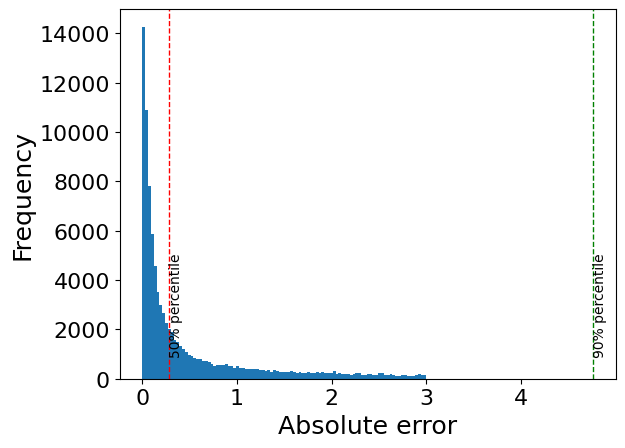

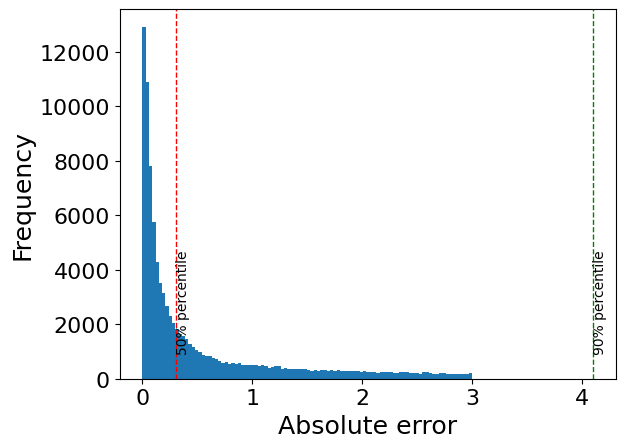

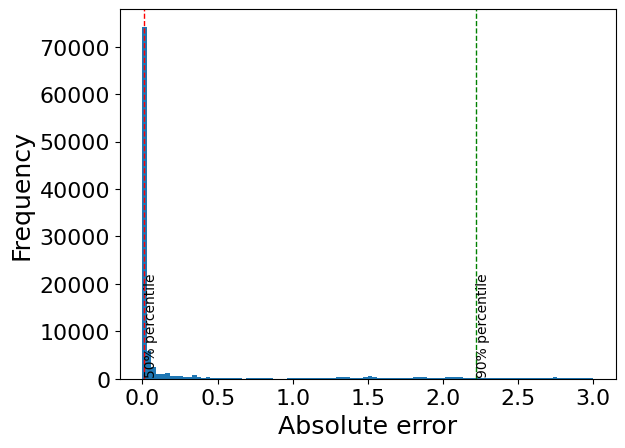

In [9]:
for idx, y_pred in enumerate(y_preds):
    errors = np.abs(y_test - y_pred)

    # plot histogram of errors
    plt.hist(errors, bins=100, range=(0, 3))
    plt.xlabel('Absolute error')
    plt.ylabel('Frequency')

    # add vertical lines at 50% and 90% percentile
    percentiles = np.percentile(errors, [50, 90])
    plt.axvline(percentiles[0], color='red', linestyle='dashed', linewidth=1)
    plt.axvline(percentiles[1], color='green', linestyle='dashed', linewidth=1)

    # add appropriate labels
    plt.text(percentiles[0], 1000, '50% percentile', rotation=90)
    plt.text(percentiles[1], 1000, '90% percentile', rotation=90)

    plt.show()

In [10]:
cmap = plt.get_cmap('tab20b')

wang


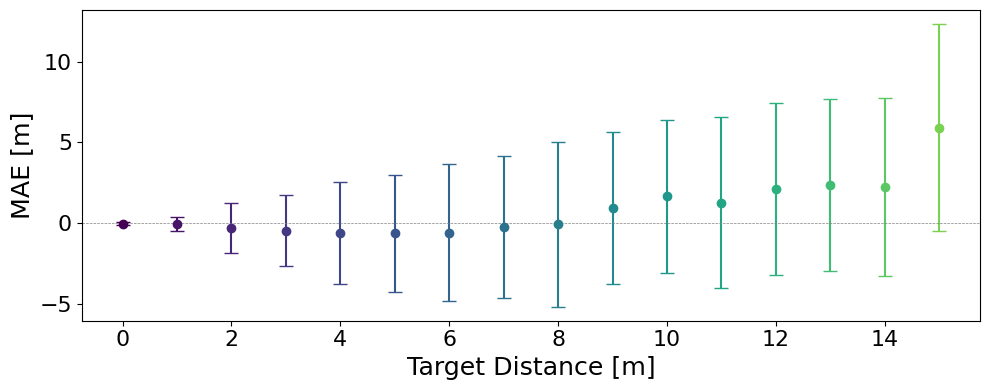

Mean angular difference per id 0.8462548368308073
Mean Standard deviation angular difference per id 3.889212081627851
Median Standard deviation angular difference per id 4.568207562182408
Median angular difference per id -0.04738400518201994
Max angular difference per id 5.927401199955611
Min angular difference per id -0.6286196728357205
Max Standard deviation angular difference per id 6.407848753614877
Min Standard deviation angular difference per id 0.07495220293792759
weier


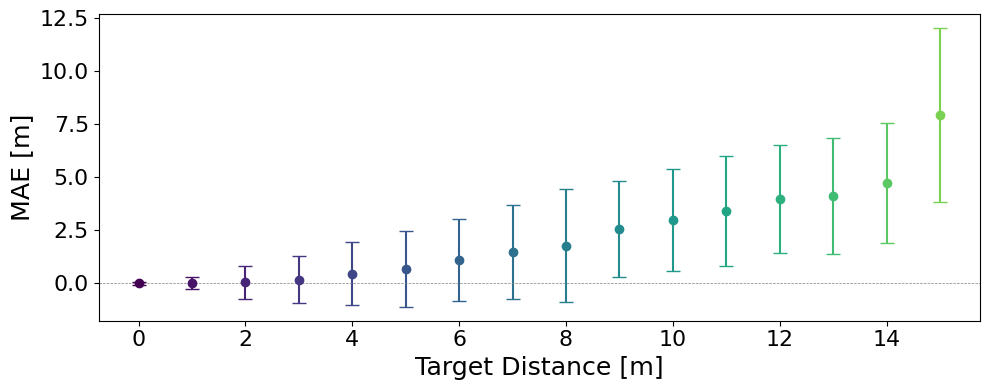

Mean angular difference per id 2.2085084412036027
Mean Standard deviation angular difference per id 1.986785846582361
Median Standard deviation angular difference per id 2.2412262278422324
Median angular difference per id 1.6123795643698253
Max angular difference per id 7.927876972028714
Min angular difference per id 0.0037369722854379587
Max Standard deviation angular difference per id 4.0962070827808965
Min Standard deviation angular difference per id 0.07063542542405186
center


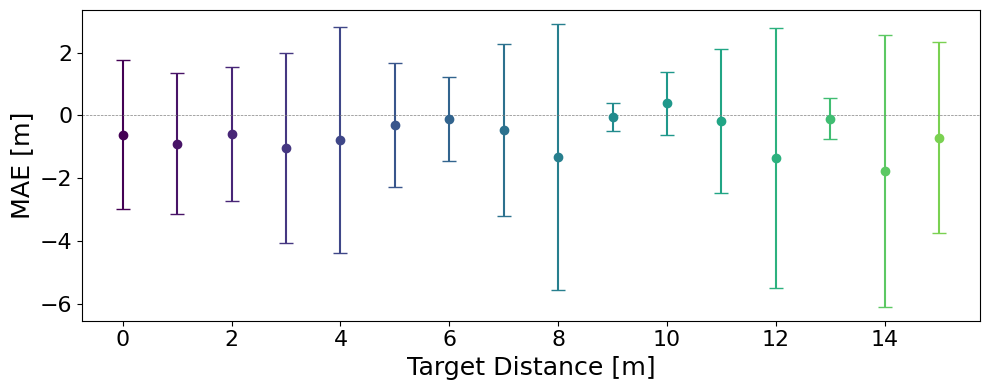

Mean angular difference per id -0.6219706020788731
Mean Standard deviation angular difference per id 2.4736481740720007
Median Standard deviation angular difference per id 2.328874452460523
Median angular difference per id -0.6076369844416285
Max angular difference per id 0.3849152814505005
Min angular difference per id -1.7667814888469153
Max Standard deviation angular difference per id 4.329400718694343
Min Standard deviation angular difference per id 0.4453037264936491


In [11]:
for idx, y_pred in enumerate(y_preds):
    print(names[idx])
    errors = y_test - y_pred

    # bin errors by distance, in binsize=1 m bins, but put everything from 7m on in one bin
    bins = np.arange(0, 8, 0.5)
    bins = np.append(bins, 20)
    bin_indices = np.digitize(y_test, bins)

    # calculate mean and standard deviation of errors per bin
    mean_errors_per_bin = np.array([np.mean(errors[bin_indices == i]) for i in range(1, len(bins))])
    std_errors_per_bin = np.array([np.std(errors[bin_indices == i]) for i in range(1, len(bins))])

    # plot depending on distance
    fig, ax = plt.subplots(figsize=(10, 4))
    
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(std_errors_per_bin)))  # You can choose any colormap

    # Plot each data point with a different color
    for i in range(len(std_errors_per_bin)):
        plt.errorbar(i, mean_errors_per_bin[i], yerr=std_errors_per_bin[i], fmt='o', color=colors[i], capsize=5)

    plt.xlabel('Target Distance [m]')
    plt.ylabel('MAE [m]')
        # add horizontal line at y=0
    plt.axhline(0, color='grey', linewidth=0.5, linestyle='--')
    plt.tight_layout()
    #plt.savefig(os.path.join(figpath, names[idx] + '_error_over_distance.pdf'), format='pdf', dpi=1000)
    plt.show()

    print('Mean angular difference per id', np.mean(mean_errors_per_bin))
    print('Mean Standard deviation angular difference per id', np.mean(std_errors_per_bin))
    print('Median Standard deviation angular difference per id', np.median(std_errors_per_bin))
    print('Median angular difference per id', np.median(mean_errors_per_bin))

    # min and max
    print('Max angular difference per id', np.max(mean_errors_per_bin))
    print('Min angular difference per id', np.min(mean_errors_per_bin))

    print('Max Standard deviation angular difference per id', np.max(std_errors_per_bin))
    print('Min Standard deviation angular difference per id', np.min(std_errors_per_bin))


In [12]:
figwidth_fraction = 0.8
base_font_size_labels = 8
base_font_size_ticks = 7

label_font_size = base_font_size_labels / figwidth_fraction
tick_font_size = base_font_size_ticks / figwidth_fraction

params = {'legend.fontsize': label_font_size,
         'axes.labelsize': label_font_size,
         'axes.titlesize': label_font_size,
         'xtick.labelsize': tick_font_size,
         'ytick.labelsize': tick_font_size}
pylab.rcParams.update(params)

16
16
16


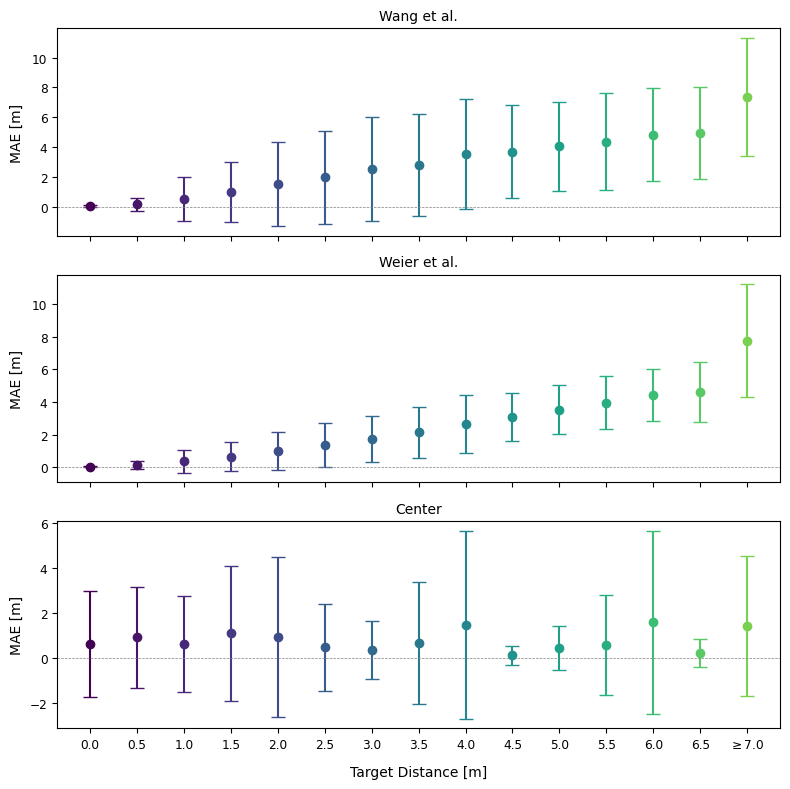

In [13]:
figwidth_fraction = 0.8
base_font_size_labels = 9
base_font_size_ticks = 9

label_font_size = base_font_size_labels / figwidth_fraction
tick_font_size = base_font_size_ticks / figwidth_fraction

fig, axs = plt.subplots(3, 1, figsize=(8,8), sharex=True)
names = ['Wang et al.', 'Weier et al.', 'Center']
for idx, y_pred in enumerate(y_preds):
    errors = np.abs(y_test - y_pred)

    # bin errors by distance, in binsize=1 m bins, but put everything from 7m on in one bin
    bins = np.arange(0, 7.5, 0.5)
    bins = np.append(bins, 20)
    bin_indices = np.digitize(y_test, bins)

    print(len(bins))

    # calculate mean and standard deviation of errors per bin
    mean_errors_per_bin = np.array([np.mean(errors[bin_indices == i]) for i in range(1, len(bins))])
    std_errors_per_bin = np.array([np.std(errors[bin_indices == i]) for i in range(1, len(bins))])

    # plot depending on distance
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(std_errors_per_bin)))  # You can choose any colormap

    # Plot each data point with a different color
    for i in range(len(std_errors_per_bin)):
        axs[idx].errorbar(i, mean_errors_per_bin[i], yerr=std_errors_per_bin[i], fmt='o', color=colors[i], capsize=5)

    # add ticks for each bin
    axs[idx].set_xticks(range(len(bins)-1))#, fontsize=tick_font_size)
    axs[idx].set_xticklabels(np.append([f'{bins[i]}' for i in range(len(bins)-2)], [r'$\geq 7.0$']))

    axs[idx].set_ylabel('MAE [m]')
        # add horizontal line at y=0
    axs[idx].axhline(0, color='grey', linewidth=0.5, linestyle='--')
    axs[idx].set_title(names[idx])


# shared x axis
axs[-1].set_xlabel('Target Distance [m]', labelpad=10)

fig.align_ylabels(axs[:3])

plt.tight_layout()
#plt.savefig(os.path.join(figpath, 'error_over_distance.pdf'), format='pdf', dpi=1000)
plt.show()

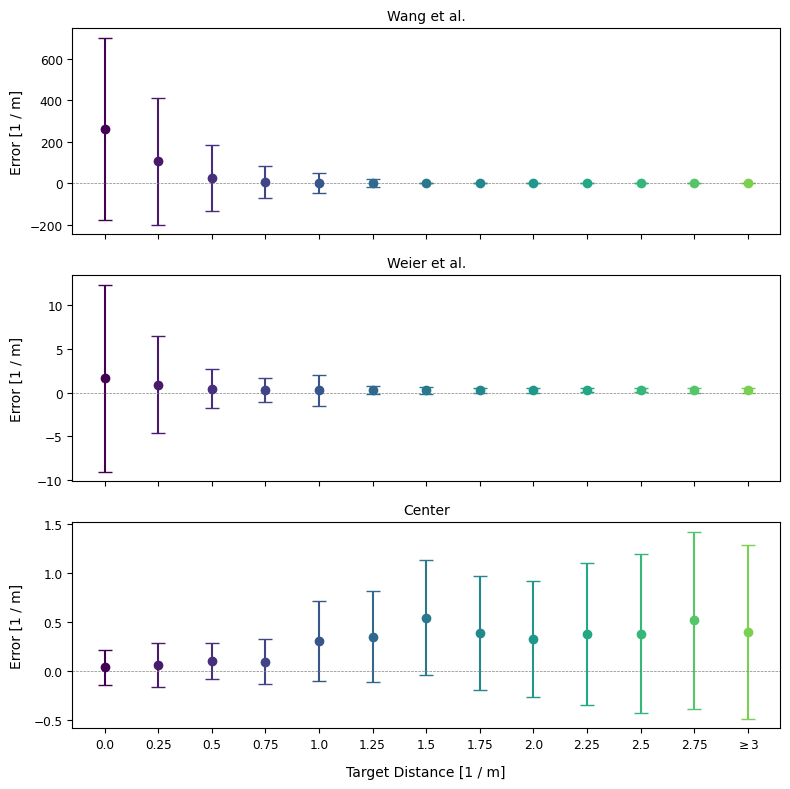

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(8,8), sharex=True)
names = ['Wang et al.', 'Weier et al.', 'Center']
for idx, y_pred in enumerate(y_preds):
    errors = np.abs(1 / y_test - 1 / y_pred)

    # bin errors by distance, in binsize=1 m bins, but put everything from 7m on in one bin
    bins = np.arange(0, 3.25, 0.25)
    bins = np.append(bins, 4)
    bin_indices = np.digitize(1 / y_test, bins)

    # calculate mean and standard deviation of errors per bin
    mean_errors_per_bin = np.array([np.mean(errors[bin_indices == i]) for i in range(1, len(bins))])
    std_errors_per_bin = np.array([np.std(errors[bin_indices == i]) for i in range(1, len(bins))])

    # plot depending on distance
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(std_errors_per_bin)))  # You can choose any colormap

    # Plot each data point with a different color
    for i in range(len(std_errors_per_bin)):
        axs[idx].errorbar(i, mean_errors_per_bin[i], yerr=std_errors_per_bin[i], fmt='o', color=colors[i], capsize=5)

    #axs[idx].set_xlabel('Target Distance [m]')
    axs[idx].set_ylabel('Error [1 / m]')
    axs[idx].set_title(names[idx])
    axs[idx].axhline(0, color='grey', linewidth=0.5, linestyle='--')
    

        # add ticks for each bin
    axs[idx].set_xticks(range(len(bins)-1))
    axs[idx].set_xticklabels(np.append([f'{bins[i]}' for i in range(len(bins)-2)], [r'$\geq 3$']))

# shared x axis

axs[-1].set_xlabel('Target Distance [1 / m]', labelpad=10)
fig.align_ylabels(axs[:3])

plt.tight_layout()
#plt.savefig(os.path.join(figpath, 'error_over_distance_diopters.pdf'), format='pdf', dpi=1000)
plt.show()

Bibliography:  

[1] R. I. Wang, B. Pelfrey, A. T. Duchowski and D. H. House, _Online Gaze Disparity via Bioncular Eye Tracking on Stereoscopic Displays_, 2012 Second International Conference on 3D Imaging, Modeling, Processing, Visualization & Transmission, Zurich, Switzerland, 2012, pp. 184-191, doi: 10.1109/3DIMPVT.2012.37.  
[2] Martin Weier, Thorsten Roth, André Hinkenjann, and Philipp Slusallek. 2018. _Predicting the gaze depth in head-mounted displays using multiple feature regression_. In Proceedings of the 2018 ACM Symposium on Eye Tracking Research \&; Applications (ETRA '18). Association for Computing Machinery, New York, NY, USA, Article 19, 1–9. https://doi.org/10.1145/3204493.3204547

